In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy

In [3]:
import scipy

In [4]:
from scipy import ndimage

In [5]:
from scipy import misc

In [6]:
import matplotlib.pyplot as plt

image in data/image

one sample image worcester_000198.jpg

In [7]:
from scipy.misc import imread, imresize

In [8]:
img = imread('data/image/worcester_000198.jpg')

In [9]:
plt.imshow(img)

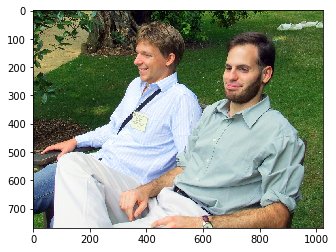

In [10]:
plt.show()

In [11]:
from keras.applications.vgg16 import VGG16

In [12]:
model = VGG16(weights='imagenet', include_top=True)

# Abtain the first 6th layers, e.g the output of first FC layer before Relu

In [13]:
import pydot

In [14]:
# displace the model
from keras.utils.visualize_util import plot
plot(model, to_file='VGG16.jpg')
# the structure should be in the directory

# Investigate the 6th layer, we want to discard relu

In [15]:
layer = model.get_layer(name = 'fc1')

In [16]:
config = layer.get_config()

In [17]:
print config

{'W_constraint': None, 'b_constraint': None, 'name': 'fc1', 'activity_regularizer': None, 'trainable': True, 'init': 'glorot_uniform', 'bias': True, 'activation': 'relu', 'input_dim': 25088, 'b_regularizer': None, 'W_regularizer': None, 'output_dim': 4096}


The config include the relu, we should remove it. (do know how). Let's just rebuild a layer and keep the trained weights. 

In [18]:
weights = layer.get_weights()

In [19]:
print weights

[array([[  1.97458430e-05,   3.53087205e-04,  -1.83276692e-03, ...,
          3.98652155e-05,  -2.87628151e-03,   3.35479970e-03],
       [ -5.35124633e-03,  -1.57129625e-03,  -3.36359517e-04, ...,
          1.87925587e-03,   1.21539313e-04,   4.34035109e-03],
       [  6.60625810e-04,   1.30032690e-03,  -1.29854062e-03, ...,
          1.88074319e-03,   1.25268090e-03,   1.70838233e-04],
       ..., 
       [ -7.45343743e-04,   3.03061306e-03,   1.17587531e-03, ...,
         -1.13666023e-03,  -2.69673765e-03,  -4.38319985e-03],
       [  1.10182700e-05,  -6.47103006e-04,  -3.58047266e-03, ...,
         -8.21363938e-06,   4.27002553e-03,  -1.09248445e-03],
       [  6.67527143e-04,   1.82665605e-03,   1.10259652e-03, ...,
         -1.70526863e-03,   1.89310894e-03,  -5.10292128e-03]], dtype=float32), array([-0.18869764,  0.12655699, -0.29960382, ..., -0.18377073,
        0.17445327, -0.16718599], dtype=float32)]


In [20]:
import numpy as np

In [21]:
weights_np = np.array(weights)

In [22]:
weights_np.shape

(2,)

In [23]:
print weights_np

[ array([[  1.97458430e-05,   3.53087205e-04,  -1.83276692e-03, ...,
          3.98652155e-05,  -2.87628151e-03,   3.35479970e-03],
       [ -5.35124633e-03,  -1.57129625e-03,  -3.36359517e-04, ...,
          1.87925587e-03,   1.21539313e-04,   4.34035109e-03],
       [  6.60625810e-04,   1.30032690e-03,  -1.29854062e-03, ...,
          1.88074319e-03,   1.25268090e-03,   1.70838233e-04],
       ..., 
       [ -7.45343743e-04,   3.03061306e-03,   1.17587531e-03, ...,
         -1.13666023e-03,  -2.69673765e-03,  -4.38319985e-03],
       [  1.10182700e-05,  -6.47103006e-04,  -3.58047266e-03, ...,
         -8.21363938e-06,   4.27002553e-03,  -1.09248445e-03],
       [  6.67527143e-04,   1.82665605e-03,   1.10259652e-03, ...,
         -1.70526863e-03,   1.89310894e-03,  -5.10292128e-03]], dtype=float32)
 array([-0.18869764,  0.12655699, -0.29960382, ..., -0.18377073,
        0.17445327, -0.16718599], dtype=float32)]


In [24]:
print weights[0].shape

(25088, 4096)


So, the weights already contain bias here!

input dim 25088   
output dim 4096

## Let's rebuild the layer

In [25]:
from keras.layers.core import Dense

In [26]:
input_dim = 25088
output_dim = 4098
my_layer = Dense(output_dim, input_dim=input_dim, weights=weights)

Build the new model

In [27]:
from keras.models import Model

new_model = Model(input=model.input, 
                  output=model.get_layer('flatten').output)

Test the new model, first forget the new layer we created

In [28]:
img = imresize(img,(224,224))

In [29]:
plt.imshow(img)

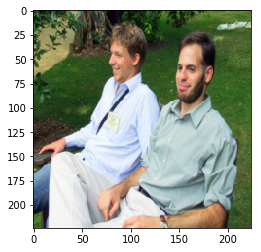

In [30]:
plt.show()

In [31]:
out = new_model.predict(img[np.newaxis])

In [32]:
out.shape

(1, 25088)

Add the new layer

In [33]:
# new_model.add(my_layer)

Can not add, just compute manuelly

In [34]:
out = out.dot(weights[0]) + weights[1]

In [35]:
out.shape

(1, 4096)

# Begin to process. First, convert all picture to neural code.

Count the number of .jpg file

In [36]:
base_dir = 'data/image/'

image_name = []
import os
for file in os.listdir(base_dir):
    if file.endswith('.jpg'):
        image_name.append(file)

In [37]:
len(image_name)

5063

# Retrieve the image from the internet

Test

In [38]:
import urllib
urllib.urlretrieve('http://kolizej.at.ua/_ph/163/2/383188704.jpg', 
                   'images2765066412')

('images2765066412', <httplib.HTTPMessage instance at 0x7fd8ec03d368>)

In [39]:
import csv
url_dir = 'data/landmark/url_id_query.txt'

with open(url_dir) as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)
print d[0][0]

http://kolizej.at.ua/_ph/163/2/383188704.jpg


In [40]:
i = 0
urllib.urlretrieve(d[i][0],'data/landmark/image/'+d[i][1])

('data/landmark/image/images2765066412',
 <httplib.HTTPMessage instance at 0x7fd8c50cf3b0>)

# Time the time need to download 128 image

Single thread: 128 images 310s

Multithread: 512 images 129s

from time import time
import traceback
import threading
import errno
from socket import error as socket_error

batch_size = 512
threads = []
tic = time()
for i in range(batch_size):
    if i%10 == 1:
        # comma to refresh the output
        print 'proccesing' + str(i/float(batch_size)) + '\r',
    try:
        thread = threading.Thread(target=retrieve_image,args=
                  (d[i][0], 'data/landmark/image/'+d[i][1]+str(i)+'.jpg'))
        thread.start()
        threads.append(thread)
    except socket_error as e:
        print traceback.format_exc()
        print 'Come across a failed link'
        
for t in threads:
    print t
    t.join()

toc = time()
print toc-tic

## Retrieve the image

In [42]:
base_dir = 'data/landmark/image/'

image_name = []
import os
for file in os.listdir(base_dir):
    if file.endswith('.jpg'):
        image_name.append(file)

In [43]:
image_number = len(image_name)
print image_number

319


## Compute the neural code

In [44]:
# input spec for VGG
w_spec = 224
h_spec = 224

data_batch = np.zeros((image_number,w_spec,h_spec,3))

for i,file in enumerate(image_name):
    image = imread(base_dir+file)
    image = imresize(image, (w_spec, h_spec))
    data_batch[i] = image

In [45]:
out = new_model.predict(data_batch)
out = out.dot(weights[0]) + weights[1]

In [46]:
print out.shape

(319, 4096)


In [47]:
for file in image_name:
    os.remove(base_dir+file)

# Put all together

In [53]:
total_size = len(d)
print total_size

270283


## Custome a tool to download .jpg since utlretrieve is too slow

In [71]:
import requests
from time import time

def retrieve_image(url, filename):
    # Make the actual request, set the timeout for no data to 10 seconds and enable streaming responses so we don't have to keep the large files in memory
    request = requests.get(url, timeout=20, stream=True)

    # Open the output file and make sure we write in binary mode
    with open(filename, 'wb') as fh:
        # Walk through the request response in chunks of 1024 bytes, so 1KB
        start_time = time()
        for chunk in request.iter_content(1024):
            # Write the chunk to the file
            fh.write(chunk)
            # Optionally we can check here if the download is taking too long
            if time() - start_time > 20:
                fh.close()
                os.remove(filename)
        fh.close()

In [ ]:
from time import time
import threading
import traceback

# j to track the index of image
j = 0
neural_code = []

while 1:
    
    # download the image
    batch_size = 2048
    threads = []
    tic = time()
    for i in range(batch_size):
        if i%128 == 0:
            # comma to refresh the output
            print 'proccesing' + str((j+i)/float(total_size)) + '\r',
        if i+j < total_size:
            thread = threading.Thread(target=retrieve_image,args=
                    (d[j+i][0], 'data/landmark/image/'+d[j+i][1]+str(i)+'.jpg'))
            thread.start()
            threads.append(thread)

    for t in threads:
        print t
        t.join()

    toc = time()
    print 'Elapse time is '+ str(toc-tic)

    # get the neural code
    base_dir = 'data/landmark/image/'

    image_name = []
    import os
    # add only jpg file
    for file in os.listdir(base_dir):
        if file.endswith('.jpg'):
            try:
                image = imread(base_dir+file)
                if len(image.shape) != 3:
                    os.remove(base_dir+file)
                    print 'not a color image'
                elif image.shape[2] != 3:
                    print 'not a RGB image'
                else:
                    image_name.append(file)
            except IOError as e:
                os.remove(base_dir+file)
        
    image_number = len(image_name)
    data_batch = np.zeros((image_number,w_spec,h_spec,3))

    j += batch_size
    if image_number == 0:
        continue
    
    for i,file in enumerate(image_name):
        image = imread(base_dir+file)
        image = imresize(image, (w_spec, h_spec))
        data_batch[i] = image
 
    out = new_model.predict(data_batch)
    out = out.dot(weights[0]) + weights[1]
    
    neural_code.append(out)
    
    if j%10 == 0:
        np.save('neural_code', neural_code)
        
    # delete the image and update j
    for file in os.listdir(base_dir):
        os.remove(base_dir+file)
    
np.save('neural_code', neural_code) 
print 'all done'

Exception in thread Thread-7158:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

Exception in thread Thread-7218:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-packa

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-7370:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/

Exception in thread Thread-7516:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

Exception in thread Thread-7589:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

Exception in thread Thread-7738:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

Exception in thread Thread-7847:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

Exception in thread Thread-7967:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-packa

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSL

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-8307:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-8292:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-8497:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/

Exception in thread Thread-8603:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-8766:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-7469:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/

Exception in thread Thread-9043:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-7119, stopped 140565513217792)>
<Thread(Thread-7120, stopped 140564590020352)>
<Thread(Thread-7121, stopped 140564556449536)>
<Thread(Thread-7122, stopped 140565295007488)>
<Thread(Thread-7123, stopped 140568994506496)>
<Thread(Thread-7124, stopped 140568986113792)>
<Thread(Thread-7125, stopped 140568977721088)>
<Thread(Thread-7126, stopped 140568969328384)>
<Thread(Thread-7127, stopped 140567073773312)>
<Thread(Thread-7128, stopped 140567065380608)>
<Thread(Thread-7129, stopped 140567056987904)>
<Thread(Thread-7130, stopped 140567048595200)>
<Thread(Thread-7131, stopped 140566696294144)>
<Thread(Thread-7132, stopped 140566687901440)>
<Thread(Thread-7133, stopped 140566679508736)>
<Thread(Thread-7134, stopped 140566671116032)>
<Thread(Thread-7135, stopped 140566662723328)>
<Thread(Thread-7136, stopped 140566654330624)>
<Thread(Thread-7137, stopped 140566645937920)>
<Thread(Thread-7138, stopped 140566637545216)>
<Thread(Thread-7139, stopped 140566629152512)>
<Thread(Threa

Exception in thread Thread-9009:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-7164, stopped 140565941245696)>
<Thread(Thread-7165, stopped 140565932852992)>
<Thread(Thread-7166, stopped 140565924460288)>
<Thread(Thread-7167, stopped 140565916067584)>
<Thread(Thread-7168, stopped 140565907674880)>
<Thread(Thread-7169, stopped 140565899282176)>
<Thread(Thread-7170, stopped 140565890889472)>
<Thread(Thread-7171, stopped 140565882496768)>
<Thread(Thread-7172, stopped 140565874104064)>
<Thread(Thread-7173, stopped 140565865711360)>
<Thread(Thread-7174, stopped 140565857318656)>
<Thread(Thread-7175, stopped 140565848925952)>
<Thread(Thread-7176, stopped 140565840533248)>
<Thread(Thread-7177, stopped 140565832140544)>
<Thread(Thread-7178, stopped 140565823747840)>
<Thread(Thread-7179, stopped 140565815355136)>
<Thread(Thread-7180, stopped 140565806962432)>
<Thread(Thread-7181, stopped 140566578796288)>
<Thread(Thread-7182, stopped 140565991601920)>
<Thread(Thread-7183, stopped 140565798569728)>
<Thread(Thread-7184, stopped 140566041958144)>
<Thread(Threa

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-9075:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/

<Thread(Thread-7194, stopped 140565714642688)>
<Thread(Thread-7195, stopped 140565706249984)>
<Thread(Thread-7196, stopped 140565697857280)>
<Thread(Thread-7197, stopped 140565689464576)>
<Thread(Thread-7198, stopped 140565681071872)>
<Thread(Thread-7199, stopped 140565672679168)>
<Thread(Thread-7200, stopped 140565664286464)>
<Thread(Thread-7201, stopped 140566696294144)>
<Thread(Thread-7202, stopped 140566687901440)>
<Thread(Thread-7203, stopped 140565655893760)>
<Thread(Thread-7204, stopped 140565966423808)>
<Thread(Thread-7205, stopped 140565647501056)>
<Thread(Thread-7206, stopped 140565639108352)>
<Thread(Thread-7207, stopped 140565630715648)>
<Thread(Thread-7208, stopped 140565622322944)>
<Thread(Thread-7209, stopped 140565613930240)>
<Thread(Thread-7210, stopped 140565605537536)>
<Thread(Thread-7211, stopped 140565597144832)>
<Thread(Thread-7212, stopped 140565588752128)>
<Thread(Thread-7213, stopped 140566620759808)>
<Thread(Thread-7214, stopped 140565580359424)>
<Thread(Threa

Exception in thread Thread-8340:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-7247, stopped 140565303400192)>
<Thread(Thread-7248, stopped 140565916067584)>
<Thread(Thread-7249, stopped 140565286614784)>
<Thread(Thread-7250, stopped 140565275862784)>
<Thread(Thread-7251, stopped 140565267470080)>
<Thread(Thread-7252, stopped 140565259077376)>
<Thread(Thread-7253, stopped 140565250684672)>
<Thread(Thread-7254, stopped 140565242291968)>
<Thread(Thread-7255, stopped 140565233899264)>
<Thread(Thread-7256, stopped 140566067136256)>
<Thread(Thread-7257, stopped 140565225506560)>
<Thread(Thread-7258, stopped 140565217113856)>
<Thread(Thread-7259, stopped 140567065380608)>
<Thread(Thread-7260, stopped 140565815355136)>
<Thread(Thread-7261, stopped 140565882496768)>
<Thread(Thread-7262, stopped 140564590020352)>
<Thread(Thread-7263, stopped 140565208721152)>
<Thread(Thread-7264, stopped 140565200328448)>
<Thread(Thread-7265, stopped 140565191935744)>
<Thread(Thread-7266, stopped 140565183543040)>
<Thread(Thread-7267, stopped 140565175150336)>
<Thread(Threa

Exception in thread Thread-7450:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-7339, stopped 140564789085952)>
<Thread(Thread-7340, stopped 140564780693248)>
<Thread(Thread-7341, stopped 140564772300544)>
<Thread(Thread-7342, stopped 140565328578304)>
<Thread(Thread-7343, stopped 140564763907840)>
<Thread(Thread-7344, stopped 140566662723328)>
<Thread(Thread-7345, stopped 140565563574016)>
<Thread(Thread-7346, stopped 140566092314368)>
<Thread(Thread-7347, stopped 140568986113792)>
<Thread(Thread-7348, stopped 140565183543040)>
<Thread(Thread-7349, stopped 140565049259776)>
<Thread(Thread-7350, stopped 140565571966720)>
<Thread(Thread-7351, stopped 140565233899264)>
<Thread(Thread-7352, stopped 140565916067584)>
<Thread(Thread-7353, stopped 140564755515136)>
<Thread(Thread-7354, stopped 140564747122432)>
<Thread(Thread-7355, stopped 140564738729728)>
<Thread(Thread-7356, stopped 140565454468864)>
<Thread(Thread-7357, stopped 140565924460288)>
<Thread(Thread-7358, stopped 140564730337024)>
<Thread(Thread-7359, stopped 140564721944320)>
<Thread(Threa

Exception in thread Thread-7957:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-7767, stopped 140565496432384)>
<Thread(Thread-7768, stopped 140565832140544)>
<Thread(Thread-7769, stopped 140564713551616)>
<Thread(Thread-7770, stopped 140565924460288)>
<Thread(Thread-7771, stopped 140566595581696)>
<Thread(Thread-7772, stopped 140566671116032)>
<Thread(Thread-7773, stopped 140565597144832)>
<Thread(Thread-7774, stopped 140568986113792)>
<Thread(Thread-7775, stopped 140565233899264)>
<Thread(Thread-7776, stopped 140565259077376)>
<Thread(Thread-7777, stopped 140564831049472)>
<Thread(Thread-7778, stopped 140564705158912)>
<Thread(Thread-7779, stopped 140565082830592)>
<Thread(Thread-7780, stopped 140565133186816)>
<Thread(Thread-7781, stopped 140564721944320)>
<Thread(Thread-7782, stopped 140564998903552)>
<Thread(Thread-7783, stopped 140564965332736)>
<Thread(Thread-7784, stopped 140564873012992)>
<Thread(Thread-7785, stopped 140564663195392)>
<Thread(Thread-7786, stopped 140564654802688)>
<Thread(Thread-7787, stopped 140565714642688)>
<Thread(Threa

Exception in thread Thread-8452:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-8250, stopped 140565378934528)>
<Thread(Thread-8251, stopped 140566587188992)>
<Thread(Thread-8252, stopped 140565689464576)>
<Thread(Thread-8253, stopped 140565806962432)>
<Thread(Thread-8254, stopped 140565848925952)>
<Thread(Thread-8255, stopped 140565597144832)>
<Thread(Thread-8256, stopped 140565681071872)>
<Thread(Thread-8257, stopped 140565049259776)>
<Thread(Thread-8258, stopped 140564562482944)>
<Thread(Thread-8259, stopped 140564211562240)>
<Thread(Thread-8260, stopped 140564203169536)>
<Thread(Thread-8261, stopped 140564638017280)>
<Thread(Thread-8262, stopped 140564194776832)>
<Thread(Thread-8263, stopped 140564186384128)>
<Thread(Thread-8264, stopped 140566092314368)>
<Thread(Thread-8265, stopped 140565208721152)>
<Thread(Thread-8266, stopped 140564965332736)>
<Thread(Thread-8267, stopped 140564847834880)>
<Thread(Thread-8268, stopped 140565563574016)>
<Thread(Thread-8269, stopped 140566679508736)>
<Thread(Thread-8270, stopped 140565714642688)>
<Thread(Threa

Exception in thread Thread-8586:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-8616, stopped 140565664286464)>
<Thread(Thread-8617, stopped 140565166757632)>
<Thread(Thread-8618, stopped 140566050350848)>
<Thread(Thread-8619, stopped 140564430558976)>
<Thread(Thread-8620, stopped 140565479646976)>
<Thread(Thread-8621, stopped 140564881405696)>
<Thread(Thread-8622, stopped 140564780693248)>
<Thread(Thread-8623, stopped 140564805871360)>
<Thread(Thread-8624, stopped 140566645937920)>
<Thread(Thread-8625, stopped 140565840533248)>
<Thread(Thread-8626, stopped 140564562482944)>
<Thread(Thread-8627, stopped 140567056987904)>
<Thread(Thread-8628, stopped 140566612367104)>
<Thread(Thread-8629, stopped 140566595581696)>
<Thread(Thread-8630, stopped 140566083921664)>
<Thread(Thread-8631, stopped 140565250684672)>
<Thread(Thread-8632, stopped 140565242291968)>
<Thread(Thread-8633, stopped 140565857318656)>
<Thread(Thread-8634, stopped 140565655893760)>
<Thread(Thread-8635, stopped 140565647501056)>
<Thread(Thread-8636, stopped 140565613930240)>
<Thread(Threa

Exception in thread Thread-8688:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-8654, stopped 140566654330624)>
<Thread(Thread-8655, stopped 140565865711360)>
<Thread(Thread-8656, stopped 140565630715648)>
<Thread(Thread-8657, stopped 140565496432384)>
<Thread(Thread-8658, stopped 140565387327232)>
<Thread(Thread-8659, stopped 140566612367104)>
<Thread(Thread-8660, stopped 140566696294144)>
<Thread(Thread-8661, stopped 140565259077376)>
<Thread(Thread-8662, stopped 140564973725440)>
<Thread(Thread-8663, stopped 140565714642688)>
<Thread(Thread-8664, started 140565874104064)>
<Thread(Thread-8665, stopped 140565286614784)>
<Thread(Thread-8666, stopped 140564303881984)>
<Thread(Thread-8667, stopped 140565580359424)>
<Thread(Thread-8668, stopped 140565208721152)>
<Thread(Thread-8669, stopped 140566671116032)>
<Thread(Thread-8670, stopped 140565647501056)>
<Thread(Thread-8671, stopped 140564203169536)>
<Thread(Thread-8672, stopped 140565353756416)>
<Thread(Thread-8673, stopped 140565362149120)>
<Thread(Thread-8674, stopped 140564194776832)>
<Thread(Threa

Exception in thread Thread-8710:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-8711, stopped 140564177991424)>
<Thread(Thread-8712, stopped 140564169598720)>
<Thread(Thread-8713, stopped 140564161206016)>
<Thread(Thread-8714, stopped 140564152813312)>
<Thread(Thread-8715, stopped 140564388595456)>
<Thread(Thread-8716, stopped 140564144420608)>
<Thread(Thread-8717, stopped 140565454468864)>
<Thread(Thread-8718, stopped 140565267470080)>
<Thread(Thread-8719, stopped 140564136027904)>
<Thread(Thread-8720, stopped 140565191935744)>
<Thread(Thread-8721, stopped 140564127635200)>
<Thread(Thread-8722, stopped 140564119242496)>
<Thread(Thread-8723, stopped 140564110849792)>
<Thread(Thread-8724, stopped 140567056987904)>
<Thread(Thread-8725, stopped 140564102457088)>
<Thread(Thread-8726, stopped 140564780693248)>
<Thread(Thread-8727, stopped 140565141579520)>
<Thread(Thread-8728, stopped 140564094064384)>
<Thread(Thread-8729, stopped 140564085671680)>
<Thread(Thread-8730, stopped 140564514486016)>
<Thread(Thread-8731, stopped 140565689464576)>
<Thread(Threa

Exception in thread Thread-8789:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-packa

<Thread(Thread-8790, stopped 140565848925952)>
<Thread(Thread-8791, stopped 140563984959232)>
<Thread(Thread-8792, started 140564881405696)>


Exception in thread Thread-8865:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-8793, stopped 140563976566528)>
<Thread(Thread-8794, stopped 140563968173824)>
<Thread(Thread-8795, stopped 140563959781120)>
<Thread(Thread-8796, stopped 140563951388416)>
<Thread(Thread-8797, stopped 140564923369216)>
<Thread(Thread-8798, stopped 140565267470080)>
<Thread(Thread-8799, stopped 140565655893760)>
<Thread(Thread-8800, stopped 140564472522496)>
<Thread(Thread-8801, stopped 140565748213504)>
<Thread(Thread-8802, stopped 140565387327232)>
<Thread(Thread-8803, stopped 140563942995712)>
<Thread(Thread-8804, stopped 140563934603008)>
<Thread(Thread-8805, stopped 140563926210304)>
<Thread(Thread-8806, stopped 140563917817600)>
<Thread(Thread-8807, stopped 140563909424896)>
<Thread(Thread-8808, stopped 140563901032192)>
<Thread(Thread-8809, stopped 140563892639488)>
<Thread(Thread-8810, stopped 140563884246784)>
<Thread(Thread-8811, stopped 140565647501056)>
<Thread(Thread-8812, stopped 140564587661056)>
<Thread(Thread-8813, stopped 140565454468864)>
<Thread(Threa

Exception in thread Thread-8988:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-8989, stopped 140564562482944)>
<Thread(Thread-8990, stopped 140566654330624)>
<Thread(Thread-8991, stopped 140564043708160)>
<Thread(Thread-8992, stopped 140566620759808)>
<Thread(Thread-8993, stopped 140565630715648)>
<Thread(Thread-8994, stopped 140564814264064)>
<Thread(Thread-8995, stopped 140564604446464)>
<Thread(Thread-8996, stopped 140564570875648)>
<Thread(Thread-8997, stopped 140563901032192)>
<Thread(Thread-8998, stopped 140564026922752)>
<Thread(Thread-8999, stopped 140565664286464)>
<Thread(Thread-9000, stopped 140564789085952)>
<Thread(Thread-9001, stopped 140565655893760)>
<Thread(Thread-9002, stopped 140564422166272)>
<Thread(Thread-9003, stopped 140565479646976)>
<Thread(Thread-9004, stopped 140564472522496)>
<Thread(Thread-9005, stopped 140564464129792)>
<Thread(Thread-9006, stopped 140564455737088)>
<Thread(Thread-9007, stopped 140563909424896)>
<Thread(Thread-9008, stopped 140564747122432)>
<Thread(Thread-9009, stopped 140565941245696)>
<Thread(Threa

Exception in thread Thread-9047:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-packa

<Thread(Thread-9048, stopped 140564136027904)>
<Thread(Thread-9049, stopped 140564119242496)>
<Thread(Thread-9050, stopped 140564094064384)>
<Thread(Thread-9051, stopped 140564077278976)>
<Thread(Thread-9052, stopped 140564303881984)>
<Thread(Thread-9053, stopped 140564052100864)>
<Thread(Thread-9054, stopped 140564018530048)>
<Thread(Thread-9055, stopped 140563976566528)>
<Thread(Thread-9056, stopped 140563942995712)>
<Thread(Thread-9057, stopped 140565362149120)>
<Thread(Thread-9058, stopped 140564990510848)>
<Thread(Thread-9059, stopped 140563926210304)>
<Thread(Thread-9060, stopped 140563917817600)>
<Thread(Thread-9061, stopped 140564596053760)>
<Thread(Thread-9062, stopped 140565622322944)>
<Thread(Thread-9063, stopped 140565639108352)>
<Thread(Thread-9064, stopped 140564060493568)>
<Thread(Thread-9065, stopped 140565387327232)>
<Thread(Thread-9066, stopped 140563850675968)>
<Thread(Thread-9067, stopped 140564548056832)>
<Thread(Thread-9068, stopped 140565806962432)>
<Thread(Threa

Exception in thread Thread-9205:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

Exception in thread Thread-9310:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

Exception in thread Thread-9400:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-9518:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSL

Exception in thread Thread-9755:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSL

Exception in thread Thread-10065:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSL

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-10316:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7

Exception in thread Thread-9208:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSL

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSL

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSL

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-10969:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7

Exception in thread Thread-11004:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-pack

<Thread(Thread-9167, stopped 140563833890560)>
<Thread(Thread-9168, stopped 140566671116032)>
<Thread(Thread-9169, stopped 140564881405696)>
<Thread(Thread-9170, stopped 140563934603008)>
<Thread(Thread-9171, stopped 140568994506496)>
<Thread(Thread-9172, stopped 140568986113792)>
<Thread(Thread-9173, stopped 140568977721088)>
<Thread(Thread-9174, stopped 140568969328384)>
<Thread(Thread-9175, stopped 140567073773312)>
<Thread(Thread-9176, stopped 140567065380608)>
<Thread(Thread-9177, stopped 140567056987904)>
<Thread(Thread-9178, stopped 140567048595200)>
<Thread(Thread-9179, stopped 140566696294144)>
<Thread(Thread-9180, stopped 140566687901440)>
<Thread(Thread-9181, stopped 140566679508736)>
<Thread(Thread-9182, stopped 140566662723328)>
<Thread(Thread-9183, stopped 140566654330624)>
<Thread(Thread-9184, stopped 140566645937920)>
<Thread(Thread-9185, stopped 140566637545216)>
<Thread(Thread-9186, stopped 140566629152512)>
<Thread(Thread-9187, stopped 140566620759808)>
<Thread(Threa

Exception in thread Thread-11100:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-pack

<Thread(Thread-9223, stopped 140565840533248)>
<Thread(Thread-9224, stopped 140565832140544)>
<Thread(Thread-9225, stopped 140565823747840)>
<Thread(Thread-9226, stopped 140565762643712)>
<Thread(Thread-9227, stopped 140565754251008)>
<Thread(Thread-9228, stopped 140565745858304)>
<Thread(Thread-9229, stopped 140565737465600)>
<Thread(Thread-9230, stopped 140565729072896)>
<Thread(Thread-9231, stopped 140565720680192)>
<Thread(Thread-9232, stopped 140565712287488)>
<Thread(Thread-9233, stopped 140565703894784)>
<Thread(Thread-9234, stopped 140565695502080)>
<Thread(Thread-9235, stopped 140565687109376)>
<Thread(Thread-9236, stopped 140565991601920)>
<Thread(Thread-9237, stopped 140565678716672)>
<Thread(Thread-9238, stopped 140565670323968)>
<Thread(Thread-9239, stopped 140565661931264)>
<Thread(Thread-9240, stopped 140565653538560)>
<Thread(Thread-9241, stopped 140565645145856)>
<Thread(Thread-9242, stopped 140565636753152)>
<Thread(Thread-9243, stopped 140565628360448)>
<Thread(Threa

Exception in thread Thread-9266:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-9263, stopped 140565468899072)>
<Thread(Thread-9264, stopped 140565460506368)>
<Thread(Thread-9265, stopped 140565452113664)>
<Thread(Thread-9266, stopped 140565443720960)>
<Thread(Thread-9267, stopped 140565435328256)>
<Thread(Thread-9268, stopped 140565426935552)>
<Thread(Thread-9269, stopped 140566620759808)>
<Thread(Thread-9270, stopped 140565418542848)>
<Thread(Thread-9271, stopped 140565410150144)>
<Thread(Thread-9272, stopped 140565401757440)>
<Thread(Thread-9273, stopped 140565754251008)>
<Thread(Thread-9274, stopped 140565983209216)>
<Thread(Thread-9275, stopped 140565393364736)>
<Thread(Thread-9276, stopped 140565544433408)>
<Thread(Thread-9277, stopped 140565384972032)>
<Thread(Thread-9278, stopped 140565376579328)>
<Thread(Thread-9279, stopped 140565368186624)>
<Thread(Thread-9280, stopped 140565502469888)>
<Thread(Thread-9281, stopped 140565359793920)>
<Thread(Thread-9282, stopped 140565351401216)>
<Thread(Thread-9283, stopped 140565343008512)>
<Thread(Threa

Exception in thread Thread-9555:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py

<Thread(Thread-9517, stopped 140564696766208)>
<Thread(Thread-9518, stopped 140568969328384)>
<Thread(Thread-9519, stopped 140564873012992)>
<Thread(Thread-9520, stopped 140564579268352)>
<Thread(Thread-9521, stopped 140564194776832)>
<Thread(Thread-9522, stopped 140563901032192)>
<Thread(Thread-9523, stopped 140563892639488)>
<Thread(Thread-9524, stopped 140563884246784)>
<Thread(Thread-9525, stopped 140565754251008)>
<Thread(Thread-9526, stopped 140564337452800)>
<Thread(Thread-9527, stopped 140564654802688)>
<Thread(Thread-9528, stopped 140566662723328)>
<Thread(Thread-9529, stopped 140563875854080)>
<Thread(Thread-9530, stopped 140563867461376)>
<Thread(Thread-9531, stopped 140564982118144)>
<Thread(Thread-9532, stopped 140565108008704)>
<Thread(Thread-9533, stopped 140566679508736)>
<Thread(Thread-9534, stopped 140565832140544)>
<Thread(Thread-9535, stopped 140564177991424)>
<Thread(Thread-9536, stopped 140565670323968)>
<Thread(Thread-9537, stopped 140565141579520)>
<Thread(Threa

Exception in thread Thread-10110:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10042, stopped 140564253525760)>
<Thread(Thread-10043, stopped 140565141579520)>
<Thread(Thread-10044, stopped 140564245133056)>
<Thread(Thread-10045, stopped 140564236740352)>
<Thread(Thread-10046, stopped 140565452113664)>
<Thread(Thread-10047, stopped 140564337452800)>
<Thread(Thread-10048, stopped 140565536040704)>
<Thread(Thread-10049, stopped 140566587188992)>
<Thread(Thread-10050, stopped 140565275862784)>
<Thread(Thread-10051, stopped 140565907674880)>
<Thread(Thread-10052, stopped 140563993351936)>
<Thread(Thread-10053, stopped 140565435328256)>
<Thread(Thread-10054, stopped 140565494077184)>
<Thread(Thread-10055, stopped 140565737465600)>
<Thread(Thread-10056, stopped 140565603182336)>
<Thread(Thread-10057, stopped 140564646409984)>
<Thread(Thread-10058, stopped 140566050350848)>
<Thread(Thread-10059, stopped 140563884246784)>
<Thread(Thread-10060, stopped 140567048595200)>
<Thread(Thread-10061, stopped 140565544433408)>
<Thread(Thread-10062, stopped 1405651164

Exception in thread Thread-10173:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10174, stopped 140565754251008)>
<Thread(Thread-10175, stopped 140564211562240)>
<Thread(Thread-10176, stopped 140565720680192)>
<Thread(Thread-10177, started 140565712287488)>
<Thread(Thread-10178, stopped 140565703894784)>
<Thread(Thread-10179, stopped 140565091223296)>
<Thread(Thread-10180, stopped 140564965332736)>
<Thread(Thread-10181, stopped 140565460506368)>
<Thread(Thread-10182, stopped 140565949638400)>
<Thread(Thread-10183, stopped 140564747122432)>
<Thread(Thread-10184, stopped 140565015688960)>
<Thread(Thread-10185, stopped 140565762643712)>
<Thread(Thread-10186, stopped 140565695502080)>
<Thread(Thread-10187, stopped 140565661931264)>
<Thread(Thread-10188, stopped 140564814264064)>
<Thread(Thread-10189, stopped 140565578004224)>
<Thread(Thread-10190, stopped 140565552826112)>
<Thread(Thread-10191, started 140565544433408)>


Exception in thread Thread-10202:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10192, stopped 140565494077184)>
<Thread(Thread-10193, stopped 140564303881984)>
<Thread(Thread-10194, stopped 140565426935552)>
<Thread(Thread-10195, stopped 140564018530048)>
<Thread(Thread-10196, stopped 140564956940032)>
<Thread(Thread-10197, stopped 140564889798400)>
<Thread(Thread-10198, stopped 140565619967744)>
<Thread(Thread-10199, stopped 140565317830400)>
<Thread(Thread-10200, stopped 140564931761920)>
<Thread(Thread-10201, stopped 140565899282176)>
<Thread(Thread-10202, stopped 140564312274688)>
<Thread(Thread-10203, stopped 140564320667392)>
<Thread(Thread-10204, stopped 140564965332736)>
<Thread(Thread-10205, stopped 140565958031104)>
<Thread(Thread-10206, stopped 140565091223296)>
<Thread(Thread-10207, stopped 140566637545216)>
<Thread(Thread-10208, stopped 140565384972032)>
<Thread(Thread-10209, stopped 140565376579328)>
<Thread(Thread-10210, stopped 140566645937920)>
<Thread(Thread-10211, stopped 140565351401216)>
<Thread(Thread-10212, stopped 1405653262

Exception in thread Thread-10259:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10260, started 140566008387328)>
<Thread(Thread-10261, stopped 140565958031104)>
<Thread(Thread-10262, stopped 140566025172736)>
<Thread(Thread-10263, stopped 140564596053760)>
<Thread(Thread-10264, stopped 140564495341312)>
<Thread(Thread-10265, stopped 140563833890560)>
<Thread(Thread-10266, started 140568994506496)>
<Thread(Thread-10267, started 140566578796288)>
<Thread(Thread-10268, stopped 140565183543040)>
<Thread(Thread-10269, stopped 140564931761920)>
<Thread(Thread-10270, stopped 140565874104064)>
<Thread(Thread-10271, stopped 140565502469888)>
<Thread(Thread-10272, stopped 140564696766208)>
<Thread(Thread-10273, stopped 140567048595200)>
<Thread(Thread-10274, stopped 140565393364736)>
<Thread(Thread-10275, stopped 140565384972032)>
<Thread(Thread-10276, stopped 140564337452800)>
<Thread(Thread-10277, stopped 140565729072896)>
<Thread(Thread-10278, stopped 140565865711360)>
<Thread(Thread-10279, stopped 140564747122432)>
<Thread(Thread-10280, stopped 1405659832

Exception in thread Thread-10284:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10284, started 140566629152512)>
<Thread(Thread-10285, stopped 140565519255296)>
<Thread(Thread-10286, stopped 140564127635200)>
<Thread(Thread-10287, stopped 140564018530048)>
<Thread(Thread-10288, stopped 140567073773312)>
<Thread(Thread-10289, stopped 140568977721088)>
<Thread(Thread-10290, stopped 140566662723328)>
<Thread(Thread-10291, stopped 140566058743552)>
<Thread(Thread-10292, stopped 140565578004224)>
<Thread(Thread-10293, stopped 140564444985088)>
<Thread(Thread-10294, stopped 140566016780032)>
<Thread(Thread-10295, stopped 140565999994624)>
<Thread(Thread-10296, stopped 140565991601920)>
<Thread(Thread-10297, stopped 140565924460288)>
<Thread(Thread-10298, stopped 140566075528960)>
<Thread(Thread-10299, stopped 140565823747840)>
<Thread(Thread-10300, stopped 140565108008704)>
<Thread(Thread-10301, stopped 140565916067584)>
<Thread(Thread-10302, stopped 140565907674880)>
<Thread(Thread-10303, stopped 140565882496768)>
<Thread(Thread-10304, started 1405658321

Exception in thread Thread-10319:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10320, stopped 140565326223104)>
<Thread(Thread-10321, stopped 140564320667392)>
<Thread(Thread-10322, stopped 140566654330624)>
<Thread(Thread-10323, stopped 140565267470080)>
<Thread(Thread-10324, stopped 140565091223296)>
<Thread(Thread-10325, stopped 140565015688960)>
<Thread(Thread-10326, stopped 140564688373504)>
<Thread(Thread-10327, stopped 140565974816512)>
<Thread(Thread-10328, stopped 140564219954944)>
<Thread(Thread-10329, stopped 140565561218816)>
<Thread(Thread-10330, stopped 140565343008512)>
<Thread(Thread-10331, stopped 140565242291968)>
<Thread(Thread-10332, stopped 140565133186816)>
<Thread(Thread-10333, stopped 140564923369216)>
<Thread(Thread-10334, stopped 140564906583808)>
<Thread(Thread-10335, stopped 140564956940032)>
<Thread(Thread-10336, stopped 140565426935552)>
<Thread(Thread-10337, stopped 140565250684672)>
<Thread(Thread-10338, stopped 140565720680192)>
<Thread(Thread-10339, started 140564898191104)>
<Thread(Thread-10340, stopped 1405648730

Exception in thread Thread-10378:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10360, stopped 140565949638400)>
<Thread(Thread-10361, stopped 140565225506560)>
<Thread(Thread-10362, stopped 140564646409984)>
<Thread(Thread-10363, stopped 140564629624576)>
<Thread(Thread-10364, stopped 140566067136256)>
<Thread(Thread-10365, stopped 140564470163200)>
<Thread(Thread-10366, stopped 140564621231872)>
<Thread(Thread-10367, stopped 140564587661056)>
<Thread(Thread-10368, stopped 140565040867072)>
<Thread(Thread-10369, stopped 140565099616000)>
<Thread(Thread-10370, stopped 140564211562240)>
<Thread(Thread-10371, stopped 140565729072896)>
<Thread(Thread-10372, stopped 140564570875648)>
<Thread(Thread-10373, stopped 140564537304832)>
<Thread(Thread-10374, stopped 140564512126720)>
<Thread(Thread-10375, stopped 140564503734016)>
<Thread(Thread-10376, stopped 140564486948608)>
<Thread(Thread-10377, stopped 140565460506368)>
<Thread(Thread-10378, stopped 140564303881984)>
<Thread(Thread-10379, stopped 140564211562240)>
<Thread(Thread-10380, stopped 1405656283

Exception in thread Thread-10419:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10420, stopped 140564654802688)>
<Thread(Thread-10421, stopped 140565874104064)>
<Thread(Thread-10422, stopped 140564604446464)>
<Thread(Thread-10423, stopped 140565983209216)>
<Thread(Thread-10424, stopped 140566612367104)>
<Thread(Thread-10425, stopped 140564948547328)>
<Thread(Thread-10426, stopped 140565519255296)>
<Thread(Thread-10427, stopped 140568977721088)>
<Thread(Thread-10428, stopped 140565527648000)>
<Thread(Thread-10429, stopped 140565301044992)>
<Thread(Thread-10430, stopped 140564696766208)>
<Thread(Thread-10431, stopped 140567048595200)>
<Thread(Thread-10432, stopped 140565865711360)>
<Thread(Thread-10433, stopped 140564906583808)>
<Thread(Thread-10434, stopped 140566050350848)>
<Thread(Thread-10435, stopped 140565326223104)>
<Thread(Thread-10436, stopped 140565645145856)>
<Thread(Thread-10437, stopped 140565359793920)>
<Thread(Thread-10438, stopped 140566075528960)>
<Thread(Thread-10439, stopped 140566637545216)>
<Thread(Thread-10440, stopped 1405652255

Exception in thread Thread-10496:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10483, stopped 140564403021568)>
<Thread(Thread-10484, stopped 140564923369216)>
<Thread(Thread-10485, stopped 140565426935552)>
<Thread(Thread-10486, stopped 140565074437888)>
<Thread(Thread-10487, stopped 140566067136256)>
<Thread(Thread-10488, stopped 140564822656768)>
<Thread(Thread-10489, stopped 140564847834880)>
<Thread(Thread-10490, stopped 140563884246784)>
<Thread(Thread-10491, stopped 140565628360448)>
<Thread(Thread-10492, stopped 140565949638400)>
<Thread(Thread-10493, stopped 140565611575040)>
<Thread(Thread-10494, stopped 140565040867072)>
<Thread(Thread-10495, stopped 140566620759808)>
<Thread(Thread-10496, stopped 140566058743552)>
<Thread(Thread-10497, stopped 140566025172736)>
<Thread(Thread-10498, stopped 140564127635200)>
<Thread(Thread-10499, stopped 140565695502080)>
<Thread(Thread-10500, stopped 140565653538560)>
<Thread(Thread-10501, stopped 140565958031104)>
<Thread(Thread-10502, stopped 140564537304832)>
<Thread(Thread-10503, stopped 1405659160

Exception in thread Thread-10551:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10552, stopped 140564990510848)>
<Thread(Thread-10553, stopped 140564931761920)>
<Thread(Thread-10554, stopped 140565326223104)>
<Thread(Thread-10555, stopped 140566050350848)>
<Thread(Thread-10556, stopped 140564721944320)>
<Thread(Thread-10557, stopped 140565619967744)>
<Thread(Thread-10558, stopped 140564789085952)>
<Thread(Thread-10559, stopped 140566637545216)>
<Thread(Thread-10560, stopped 140564998903552)>
<Thread(Thread-10561, stopped 140564696766208)>
<Thread(Thread-10562, stopped 140565991601920)>
<Thread(Thread-10563, stopped 140565882496768)>
<Thread(Thread-10564, stopped 140564889798400)>
<Thread(Thread-10565, stopped 140565823747840)>
<Thread(Thread-10566, stopped 140565720680192)>
<Thread(Thread-10567, stopped 140564679980800)>
<Thread(Thread-10568, stopped 140565217113856)>
<Thread(Thread-10569, stopped 140564982118144)>
<Thread(Thread-10570, stopped 140565359793920)>
<Thread(Thread-10571, stopped 140564554090240)>
<Thread(Thread-10572, stopped 1405649233

Exception in thread Thread-10594:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10588, stopped 140565116401408)>
<Thread(Thread-10589, stopped 140565703894784)>
<Thread(Thread-10590, stopped 140564612839168)>
<Thread(Thread-10591, stopped 140567073773312)>
<Thread(Thread-10592, stopped 140566654330624)>
<Thread(Thread-10593, stopped 140565949638400)>
<Thread(Thread-10594, stopped 140566687901440)>
<Thread(Thread-10595, stopped 140564127635200)>
<Thread(Thread-10596, stopped 140564495341312)>
<Thread(Thread-10597, stopped 140564646409984)>
<Thread(Thread-10598, stopped 140565317830400)>
<Thread(Thread-10599, stopped 140565578004224)>
<Thread(Thread-10600, stopped 140565351401216)>
<Thread(Thread-10601, stopped 140565250684672)>
<Thread(Thread-10602, stopped 140565049259776)>
<Thread(Thread-10603, stopped 140564278703872)>
<Thread(Thread-10604, stopped 140565183543040)>
<Thread(Thread-10605, stopped 140565326223104)>
<Thread(Thread-10606, stopped 140565485684480)>
<Thread(Thread-10607, stopped 140565762643712)>
<Thread(Thread-10608, stopped 1405655024

Exception in thread Thread-10670:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10671, stopped 140565267470080)>
<Thread(Thread-10672, stopped 140565874104064)>
<Thread(Thread-10673, stopped 140563833890560)>
<Thread(Thread-10674, stopped 140564278703872)>
<Thread(Thread-10675, stopped 140565225506560)>
<Thread(Thread-10676, started 140565762643712)>
<Thread(Thread-10677, stopped 140564956940032)>
<Thread(Thread-10678, stopped 140566679508736)>
<Thread(Thread-10679, stopped 140564990510848)>
<Thread(Thread-10680, stopped 140564965332736)>
<Thread(Thread-10681, stopped 140568977721088)>
<Thread(Thread-10682, started 140566654330624)>
<Thread(Thread-10683, stopped 140566612367104)>
<Thread(Thread-10684, stopped 140566016780032)>
<Thread(Thread-10685, stopped 140565991601920)>
<Thread(Thread-10686, stopped 140565983209216)>
<Thread(Thread-10687, stopped 140564721944320)>
<Thread(Thread-10688, stopped 140565958031104)>
<Thread(Thread-10689, stopped 140565949638400)>
<Thread(Thread-10690, stopped 140565865711360)>
<Thread(Thread-10691, stopped 1405657206

Exception in thread Thread-10700:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10701, stopped 140565301044992)>
<Thread(Thread-10702, stopped 140565133186816)>
<Thread(Thread-10703, stopped 140565183543040)>
<Thread(Thread-10704, stopped 140564444985088)>
<Thread(Thread-10705, stopped 140565326223104)>
<Thread(Thread-10706, stopped 140565552826112)>
<Thread(Thread-10707, stopped 140565032474368)>
<Thread(Thread-10708, stopped 140565217113856)>
<Thread(Thread-10709, stopped 140565510862592)>
<Thread(Thread-10710, stopped 140564403021568)>
<Thread(Thread-10711, stopped 140565242291968)>
<Thread(Thread-10712, stopped 140565099616000)>
<Thread(Thread-10713, stopped 140565066045184)>
<Thread(Thread-10714, stopped 140565040867072)>
<Thread(Thread-10715, stopped 140564923369216)>
<Thread(Thread-10716, stopped 140565695502080)>
<Thread(Thread-10717, stopped 140564873012992)>
<Thread(Thread-10718, stopped 140565502469888)>
<Thread(Thread-10719, stopped 140564822656768)>
<Thread(Thread-10720, started 140565703894784)>
<Thread(Thread-10721, stopped 1405648058

Exception in thread Thread-10740:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10741, stopped 140566067136256)>
<Thread(Thread-10742, stopped 140564814264064)>
<Thread(Thread-10743, stopped 140564478555904)>
<Thread(Thread-10744, stopped 140564470163200)>
<Thread(Thread-10745, stopped 140564453377792)>
<Thread(Thread-10746, stopped 140565611575040)>
<Thread(Thread-10747, stopped 140565133186816)>
<Thread(Thread-10748, started 140567056987904)>
<Thread(Thread-10749, stopped 140565292652288)>
<Thread(Thread-10750, started 140565737465600)>


Exception in thread Thread-10793:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10751, stopped 140565049259776)>
<Thread(Thread-10752, stopped 140564856227584)>
<Thread(Thread-10753, stopped 140564394628864)>
<Thread(Thread-10754, stopped 140564386236160)>
<Thread(Thread-10755, stopped 140564377843456)>
<Thread(Thread-10756, stopped 140565485684480)>
<Thread(Thread-10757, stopped 140564345845504)>
<Thread(Thread-10758, stopped 140564337452800)>
<Thread(Thread-10759, stopped 140564329060096)>
<Thread(Thread-10760, stopped 140564287096576)>
<Thread(Thread-10761, stopped 140564261918464)>
<Thread(Thread-10762, stopped 140564253525760)>
<Thread(Thread-10763, stopped 140564839442176)>
<Thread(Thread-10764, stopped 140564245133056)>
<Thread(Thread-10765, stopped 140564236740352)>
<Thread(Thread-10766, stopped 140564228347648)>
<Thread(Thread-10767, stopped 140565916067584)>
<Thread(Thread-10768, stopped 140564219954944)>
<Thread(Thread-10769, stopped 140564203169536)>
<Thread(Thread-10770, stopped 140564755515136)>
<Thread(Thread-10771, stopped 1405656367

Exception in thread Thread-10900:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-10877, stopped 140565368186624)>
<Thread(Thread-10878, stopped 140565359793920)>
<Thread(Thread-10879, stopped 140564236740352)>
<Thread(Thread-10880, stopped 140565049259776)>
<Thread(Thread-10881, stopped 140565032474368)>
<Thread(Thread-10882, stopped 140565619967744)>
<Thread(Thread-10883, stopped 140565907674880)>
<Thread(Thread-10884, stopped 140564906583808)>
<Thread(Thread-10885, stopped 140565485684480)>
<Thread(Thread-10886, stopped 140564570875648)>
<Thread(Thread-10887, stopped 140564329060096)>
<Thread(Thread-10888, stopped 140564789085952)>
<Thread(Thread-10889, stopped 140564203169536)>
<Thread(Thread-10890, started 140566025172736)>


Exception in thread Thread-11035:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-pack

<Thread(Thread-10891, stopped 140564278703872)>
<Thread(Thread-10892, stopped 140568977721088)>
<Thread(Thread-10893, stopped 140565958031104)>
<Thread(Thread-10894, stopped 140564110849792)>
<Thread(Thread-10895, stopped 140564512126720)>
<Thread(Thread-10896, stopped 140565074437888)>
<Thread(Thread-10897, stopped 140564245133056)>
<Thread(Thread-10898, stopped 140566587188992)>
<Thread(Thread-10899, stopped 140565695502080)>
<Thread(Thread-10900, stopped 140564763907840)>
<Thread(Thread-10901, stopped 140565653538560)>
<Thread(Thread-10902, stopped 140565133186816)>
<Thread(Thread-10903, stopped 140565966423808)>
<Thread(Thread-10904, stopped 140565578004224)>
<Thread(Thread-10905, stopped 140564646409984)>
<Thread(Thread-10906, stopped 140564738729728)>
<Thread(Thread-10907, stopped 140567073773312)>
<Thread(Thread-10908, stopped 140564287096576)>
<Thread(Thread-10909, stopped 140565108008704)>
<Thread(Thread-10910, stopped 140564772300544)>
<Thread(Thread-10911, stopped 1405646883

Exception in thread Thread-11228:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

Exception in thread Thread-11250:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

Exception in thread Thread-11240:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-pack

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSL

Exception in thread Thread-11721:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-11865:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-11899:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 81

Exception in thread Thread-12101:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-12044:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
Exception in thread Thread-12311:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7

Exception in thread Thread-12378:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-pack

Exception in thread Thread-12637:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

Exception in thread Thread-12206:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-pack

Exception in thread Thread-12739:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-pack

Exception in thread Thread-12998:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSL

<Thread(Thread-11215, stopped 140565527648000)>
<Thread(Thread-11216, stopped 140564219954944)>
<Thread(Thread-11217, stopped 140564772300544)>
<Thread(Thread-11218, stopped 140566025172736)>
<Thread(Thread-11219, stopped 140568994506496)>
<Thread(Thread-11220, stopped 140568986113792)>
<Thread(Thread-11221, stopped 140568977721088)>
<Thread(Thread-11222, stopped 140568969328384)>
<Thread(Thread-11223, stopped 140567073773312)>
<Thread(Thread-11224, stopped 140567065380608)>
<Thread(Thread-11225, stopped 140567056987904)>
<Thread(Thread-11226, stopped 140567048595200)>
<Thread(Thread-11227, stopped 140566696294144)>
<Thread(Thread-11228, stopped 140566687901440)>
<Thread(Thread-11229, stopped 140566679508736)>
<Thread(Thread-11230, stopped 140566671116032)>
<Thread(Thread-11231, started 140566662723328)>


Exception in thread Thread-12621:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-11232, stopped 140566654330624)>
<Thread(Thread-11233, stopped 140566645937920)>
<Thread(Thread-11234, stopped 140566637545216)>
<Thread(Thread-11235, stopped 140566629152512)>
<Thread(Thread-11236, stopped 140566620759808)>
<Thread(Thread-11237, stopped 140566612367104)>
<Thread(Thread-11238, stopped 140566603974400)>
<Thread(Thread-11239, stopped 140566595581696)>
<Thread(Thread-11240, stopped 140566587188992)>
<Thread(Thread-11241, stopped 140566578796288)>
<Thread(Thread-11242, stopped 140566092314368)>
<Thread(Thread-11243, stopped 140566083921664)>
<Thread(Thread-11244, stopped 140566075528960)>
<Thread(Thread-11245, stopped 140566067136256)>
<Thread(Thread-11246, stopped 140566058743552)>
<Thread(Thread-11247, stopped 140566050350848)>
<Thread(Thread-11248, stopped 140566041958144)>
<Thread(Thread-11249, stopped 140566033565440)>
<Thread(Thread-11250, stopped 140566016780032)>
<Thread(Thread-11251, stopped 140566687901440)>
<Thread(Thread-11252, stopped 1405660083

Exception in thread Thread-11336:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-11261, stopped 140565932852992)>
<Thread(Thread-11262, stopped 140565924460288)>
<Thread(Thread-11263, stopped 140565916067584)>
<Thread(Thread-11264, stopped 140565907674880)>
<Thread(Thread-11265, stopped 140565899282176)>
<Thread(Thread-11266, stopped 140565890889472)>
<Thread(Thread-11267, stopped 140565882496768)>
<Thread(Thread-11268, stopped 140565874104064)>
<Thread(Thread-11269, stopped 140565865711360)>
<Thread(Thread-11270, stopped 140565857318656)>
<Thread(Thread-11271, stopped 140565848925952)>
<Thread(Thread-11272, stopped 140565840533248)>
<Thread(Thread-11273, stopped 140565832140544)>
<Thread(Thread-11274, stopped 140565823747840)>
<Thread(Thread-11275, stopped 140565762643712)>
<Thread(Thread-11276, stopped 140565754251008)>
<Thread(Thread-11277, stopped 140565745858304)>
<Thread(Thread-11278, stopped 140565737465600)>
<Thread(Thread-11279, stopped 140565729072896)>
<Thread(Thread-11280, stopped 140565720680192)>
<Thread(Thread-11281, stopped 1405657122

Exception in thread Thread-11481:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-11482, stopped 140564278703872)>
<Thread(Thread-11483, stopped 140564270311168)>
<Thread(Thread-11484, stopped 140564261918464)>
<Thread(Thread-11485, stopped 140564253525760)>
<Thread(Thread-11486, stopped 140565368186624)>
<Thread(Thread-11487, stopped 140564889798400)>
<Thread(Thread-11488, stopped 140564780693248)>
<Thread(Thread-11489, started 140566033565440)>
<Thread(Thread-11490, stopped 140565619967744)>
<Thread(Thread-11491, stopped 140564612839168)>
<Thread(Thread-11492, stopped 140565191935744)>
<Thread(Thread-11493, stopped 140566016780032)>
<Thread(Thread-11494, stopped 140565384972032)>
<Thread(Thread-11495, stopped 140564362630912)>
<Thread(Thread-11496, stopped 140565208721152)>
<Thread(Thread-11497, stopped 140566058743552)>
<Thread(Thread-11498, stopped 140564889798400)>
<Thread(Thread-11499, stopped 140565661931264)>
<Thread(Thread-11500, stopped 140565536040704)>
<Thread(Thread-11501, stopped 140565183543040)>
<Thread(Thread-11502, stopped 1405643542

Exception in thread Thread-12720:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-11534, stopped 140565334615808)>
<Thread(Thread-11535, stopped 140566671116032)>
<Thread(Thread-11536, stopped 140565384972032)>
<Thread(Thread-11537, stopped 140564864620288)>
<Thread(Thread-11538, stopped 140566050350848)>
<Thread(Thread-11539, stopped 140564386236160)>
<Thread(Thread-11540, stopped 140565040867072)>
<Thread(Thread-11541, stopped 140566671116032)>
<Thread(Thread-11542, stopped 140564394628864)>
<Thread(Thread-11543, stopped 140564679980800)>
<Thread(Thread-11544, stopped 140564503734016)>
<Thread(Thread-11545, started 140565670323968)>
<Thread(Thread-11546, stopped 140567056987904)>
<Thread(Thread-11547, stopped 140565958031104)>
<Thread(Thread-11548, stopped 140564419806976)>
<Thread(Thread-11549, stopped 140565527648000)>
<Thread(Thread-11550, stopped 140566008387328)>
<Thread(Thread-11551, stopped 140564973725440)>
<Thread(Thread-11552, stopped 140565916067584)>
<Thread(Thread-11553, stopped 140564570875648)>
<Thread(Thread-11554, stopped 1405656115

Exception in thread Thread-11626:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-11627, stopped 140565907674880)>
<Thread(Thread-11628, stopped 140565882496768)>
<Thread(Thread-11629, stopped 140565874104064)>
<Thread(Thread-11630, stopped 140565865711360)>
<Thread(Thread-11631, stopped 140565857318656)>
<Thread(Thread-11632, stopped 140565823747840)>
<Thread(Thread-11633, stopped 140565015688960)>
<Thread(Thread-11634, stopped 140564312274688)>
<Thread(Thread-11635, stopped 140565966423808)>
<Thread(Thread-11636, stopped 140564956940032)>
<Thread(Thread-11637, stopped 140565762643712)>
<Thread(Thread-11638, stopped 140564898191104)>
<Thread(Thread-11639, stopped 140566696294144)>
<Thread(Thread-11640, stopped 140565983209216)>
<Thread(Thread-11641, stopped 140564545697536)>
<Thread(Thread-11642, stopped 140567073773312)>
<Thread(Thread-11643, stopped 140568986113792)>
<Thread(Thread-11644, stopped 140566016780032)>
<Thread(Thread-11645, stopped 140565334615808)>
<Thread(Thread-11646, stopped 140565762643712)>
<Thread(Thread-11647, stopped 1405648730

Exception in thread Thread-11669:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-11670, stopped 140564596053760)>
<Thread(Thread-11671, stopped 140566050350848)>
<Thread(Thread-11672, stopped 140565477291776)>
<Thread(Thread-11673, stopped 140565183543040)>
<Thread(Thread-11674, stopped 140564554090240)>
<Thread(Thread-11675, stopped 140564587661056)>
<Thread(Thread-11676, stopped 140565737465600)>
<Thread(Thread-11677, stopped 140565729072896)>
<Thread(Thread-11678, stopped 140565720680192)>
<Thread(Thread-11679, stopped 140565712287488)>
<Thread(Thread-11680, stopped 140567065380608)>
<Thread(Thread-11681, stopped 140564612839168)>
<Thread(Thread-11682, stopped 140565949638400)>
<Thread(Thread-11683, stopped 140565636753152)>
<Thread(Thread-11684, stopped 140565057652480)>
<Thread(Thread-11685, stopped 140564545697536)>
<Thread(Thread-11686, stopped 140568977721088)>
<Thread(Thread-11687, stopped 140566654330624)>
<Thread(Thread-11688, stopped 140566603974400)>
<Thread(Thread-11689, stopped 140564345845504)>
<Thread(Thread-11690, stopped 1405649149

Exception in thread Thread-13191:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-11897, stopped 140565636753152)>
<Thread(Thread-11898, stopped 140568969328384)>
<Thread(Thread-11899, stopped 140565426935552)>
<Thread(Thread-11900, stopped 140566637545216)>
<Thread(Thread-11901, stopped 140564873012992)>
<Thread(Thread-11902, stopped 140565527648000)>
<Thread(Thread-11903, stopped 140565443720960)>
<Thread(Thread-11904, stopped 140565840533248)>
<Thread(Thread-11905, stopped 140564780693248)>
<Thread(Thread-11906, stopped 140564604446464)>
<Thread(Thread-11907, stopped 140566612367104)>
<Thread(Thread-11908, stopped 140565949638400)>
<Thread(Thread-11909, stopped 140565343008512)>
<Thread(Thread-11910, stopped 140565594789632)>
<Thread(Thread-11911, stopped 140566058743552)>
<Thread(Thread-11912, stopped 140565966423808)>
<Thread(Thread-11913, stopped 140565916067584)>
<Thread(Thread-11914, stopped 140565544433408)>
<Thread(Thread-11915, stopped 140565848925952)>
<Thread(Thread-11916, stopped 140566050350848)>
<Thread(Thread-11917, stopped 1405654605

Exception in thread Thread-11947:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-11948, stopped 140564671588096)>
<Thread(Thread-11949, stopped 140565124794112)>
<Thread(Thread-11950, stopped 140565116401408)>
<Thread(Thread-11951, stopped 140564873012992)>
<Thread(Thread-11952, stopped 140565468899072)>
<Thread(Thread-11953, stopped 140565628360448)>
<Thread(Thread-11954, stopped 140565729072896)>
<Thread(Thread-11955, stopped 140564270311168)>
<Thread(Thread-11956, stopped 140565175150336)>
<Thread(Thread-11957, stopped 140565485684480)>
<Thread(Thread-11958, stopped 140566629152512)>
<Thread(Thread-11959, stopped 140565712287488)>
<Thread(Thread-11960, stopped 140565857318656)>
<Thread(Thread-11961, stopped 140565720680192)>
<Thread(Thread-11962, stopped 140565158364928)>
<Thread(Thread-11963, stopped 140564906583808)>
<Thread(Thread-11964, stopped 140564856227584)>
<Thread(Thread-11965, stopped 140565695502080)>
<Thread(Thread-11966, stopped 140565678716672)>
<Thread(Thread-11967, stopped 140568977721088)>
<Thread(Thread-11968, stopped 1405666543

Exception in thread Thread-12086:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.p

<Thread(Thread-12001, stopped 140565116401408)>
<Thread(Thread-12002, stopped 140566612367104)>
<Thread(Thread-12003, stopped 140565426935552)>
<Thread(Thread-12004, stopped 140565712287488)>
<Thread(Thread-12005, stopped 140565932852992)>
<Thread(Thread-12006, stopped 140565857318656)>
<Thread(Thread-12007, stopped 140564377843456)>
<Thread(Thread-12008, stopped 140565443720960)>
<Thread(Thread-12009, stopped 140565057652480)>
<Thread(Thread-12010, stopped 140565435328256)>
<Thread(Thread-12011, stopped 140564898191104)>
<Thread(Thread-12012, stopped 140565762643712)>
<Thread(Thread-12013, stopped 140565183543040)>
<Thread(Thread-12014, stopped 140564562482944)>
<Thread(Thread-12015, stopped 140565958031104)>
<Thread(Thread-12016, stopped 140565594789632)>
<Thread(Thread-12017, stopped 140564503734016)>
<Thread(Thread-12018, stopped 140564320667392)>
<Thread(Thread-12019, stopped 140565536040704)>
<Thread(Thread-12020, stopped 140565158364928)>
<Thread(Thread-12021, stopped 1405656787

Exception in thread Thread-12440:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-pack

<Thread(Thread-12441, stopped 140564428199680)>
<Thread(Thread-12442, stopped 140564411414272)>
<Thread(Thread-12443, stopped 140564654802688)>
<Thread(Thread-12444, stopped 140564839442176)>
<Thread(Thread-12445, stopped 140564982118144)>
<Thread(Thread-12446, stopped 140565477291776)>
<Thread(Thread-12447, stopped 140565267470080)>
<Thread(Thread-12448, stopped 140564495341312)>
<Thread(Thread-12449, stopped 140565678716672)>
<Thread(Thread-12450, stopped 140565999994624)>
<Thread(Thread-12451, stopped 140564403021568)>
<Thread(Thread-12452, stopped 140565502469888)>
<Thread(Thread-12453, stopped 140564646409984)>
<Thread(Thread-12454, stopped 140565099616000)>
<Thread(Thread-12455, stopped 140566092314368)>
<Thread(Thread-12456, stopped 140565519255296)>
<Thread(Thread-12457, stopped 140565292652288)>
<Thread(Thread-12458, stopped 140565368186624)>
<Thread(Thread-12459, stopped 140564403021568)>
<Thread(Thread-12460, stopped 140564562482944)>
<Thread(Thread-12461, stopped 1405647806

Exception in thread Thread-12864:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "<ipython-input-71-da3c80aa05e3>", line 6, in retrieve_image
    request = requests.get(url, timeout=20, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 70, in get
    return request('get', url, params=params, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/api.py", line 56, in request
    return session.request(method=method, url=url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 630, in send
    history = [resp for resp in gen] if allow_redirects else []
  File "/usr/local/lib/python2.7/dist-pack

<Thread(Thread-12865, stopped 140565351401216)>
<Thread(Thread-12866, stopped 140565091223296)>
<Thread(Thread-12867, stopped 140564940154624)>
<Thread(Thread-12868, stopped 140564881405696)>
<Thread(Thread-12869, stopped 140564873012992)>
<Thread(Thread-12870, stopped 140564831049472)>
<Thread(Thread-12871, stopped 140564738729728)>
<Thread(Thread-12872, stopped 140564671588096)>
<Thread(Thread-12873, stopped 140564320667392)>
<Thread(Thread-12874, stopped 140564554090240)>
<Thread(Thread-12875, stopped 140564295489280)>
<Thread(Thread-12876, stopped 140564646409984)>
<Thread(Thread-12877, stopped 140565745858304)>
<Thread(Thread-12878, stopped 140564579268352)>
<Thread(Thread-12879, stopped 140564545697536)>
<Thread(Thread-12880, stopped 140564478555904)>
<Thread(Thread-12881, stopped 140564419806976)>
<Thread(Thread-12882, stopped 140564394628864)>
<Thread(Thread-12883, stopped 140564362630912)>
<Thread(Thread-12884, stopped 140565225506560)>
<Thread(Thread-12885, stopped 1405642283

In [77]:
# clean the image

base_dir = 'data/landmark/image/'

image_name = []
import os
for file in os.listdir(base_dir):
    if file.endswith('.jpg'):
        image_name.append(file)
        
for file in image_name:
    os.remove(base_dir+file)

In [82]:
threading.active_count()

6

In [84]:
len(neural_code)

132

In [85]:
neural_code = np.vstack(neural_code)

In [86]:
print neural_code.shape

(184207, 4096)


In [91]:
np.save('neural_code', neural_code)

# Train PCA

In [88]:
import sklearn

In [90]:
from sklearn.decomposition import PCA

In [93]:
pca = PCA(n_components=128, random_state=0)

In [94]:
pca.fit(neural_code)

PCA(copy=True, iterated_power='auto', n_components=128, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

# Do the test

## Read the test image and convert to neural_code

In [99]:
test_base = 'data/image/'
image_name_test = []

for file in os.listdir(test_base):
    if file.endswith('.jpg'):
        image_name_test.append(file)

In [97]:
len(image_name_test)

5063

In [98]:
image_test_number = len(image_name_test)

In [100]:
image_test = np.zeros((image_test_number, w_spec, h_spec, 3))

for i,file in enumerate(image_name_test):
    image = imread(test_base+file)
    image = imresize(image, (w_spec, h_spec))
    image_test[i] = image

In [101]:
image_test.shape

(5063, 224, 224, 3)

In [102]:
out_test = new_model.predict(image_test)
out_test = out_test.dot(weights[0]) + weights[1]

In [103]:
out_test_128 = pca.transform(out_test)

In [112]:
out_test_128.shape

(5063, 128)

In [104]:
import random
random.seed(0)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(1, 10)


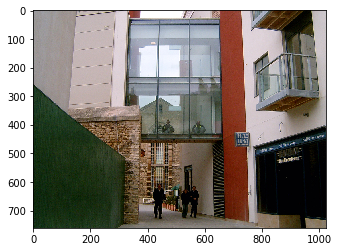

2953


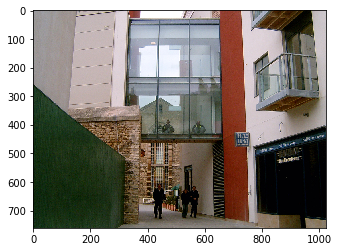

3070


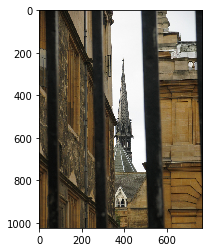

4632


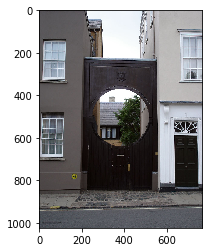

1102


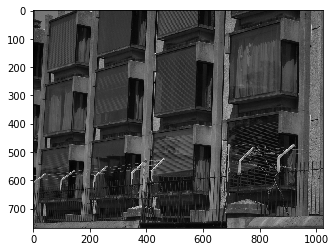

805


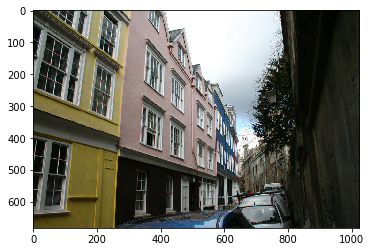

3899


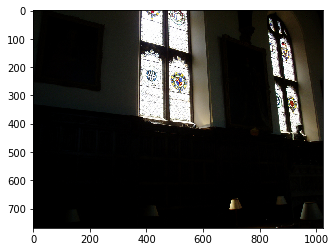

516


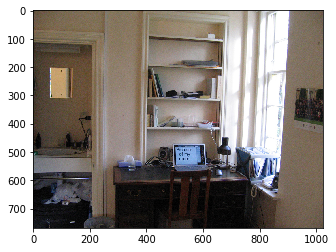

2638


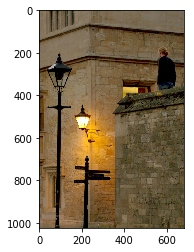

2719


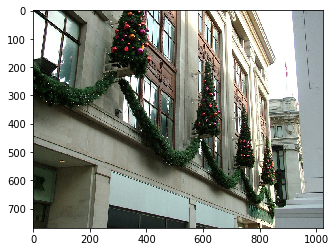

87


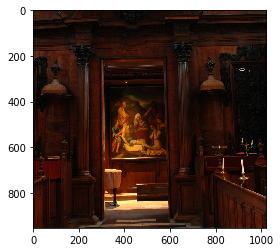

In [139]:
# Return a random integer N such that a <= N <= b.
i = random.randint(0,image_test_number-1)

query = out_test_128[i]
n_neighbors = 10

from sklearn.neighbors import NearestNeighbors as NN
nn = NN()
nn.fit(out_test_128)
neighbors = nn.kneighbors(query, n_neighbors=n_neighbors, 
                          return_distance=False)
print neighbors.shape

image = imread(test_base+image_name_test[i])
plt.imshow(image)
plt.show()

for neighbor in np.nditer(neighbors):
    print neighbor
    image = imread(test_base+image_name_test[neighbor])
    plt.imshow(image)
    plt.show()